In [1]:
import cv2
import matplotlib.pyplot as plt
from mmdet.apis import DetInferencer

In [2]:
config = r"configs/sat_data_grounding_dino_swin-t_cont_pretrain.py"
weights = r"C:\Users\may10489\Desktop\local_git\mmdetection\original_model\grounding_dino_swin-t_pretrain_obj365_goldg_grit9m_v3det_20231204_095047-b448804b.pth"

In [3]:
inferencer = DetInferencer(model=config, weights=weights, show_progress=False) #'device': 'cuda:0'
inferencer.model.test_cfg.chunked_size = -1

Loads checkpoint by local backend from path: C:\Users\may10489\Desktop\local_git\mmdetection\original_model\grounding_dino_swin-t_pretrain_obj365_goldg_grit9m_v3det_20231204_095047-b448804b.pth


C:\Users\may10489\.conda\envs\gdino_cont\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


The model and loaded state dict do not match exactly

unexpected key in source state_dict: language_model.language_backbone.body.model.embeddings.position_ids

05/29 18:46:32 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.


C:\Users\may10489\.conda\envs\gdino_cont\lib\site-packages\mmengine\visualization\visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


In [4]:
input_img = r"data/input/000000000042.tif"
out_dir = r'data/output/'
prompt = 'windmill . airplane . car'

In [5]:
out_result = inferencer(inputs=input_img, out_dir=out_dir, texts=prompt, no_save_pred=False)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\may10489\Desktop\gdino_dlpk\test_nb...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\may10489\Desktop\gdino_dlpk\test_nb...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


noun_phrases: ['windmill', 'airplane', 'car']


C:\Users\may10489\.conda\envs\gdino_cont\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
C:\Users\may10489\.conda\envs\gdino_cont\lib\site-packages\mmcv\cnn\bricks\transformer.py:524: UserWarning: position encoding of key ismissing in MultiheadAttention.
  warnings.warn(f'position encoding of key is'


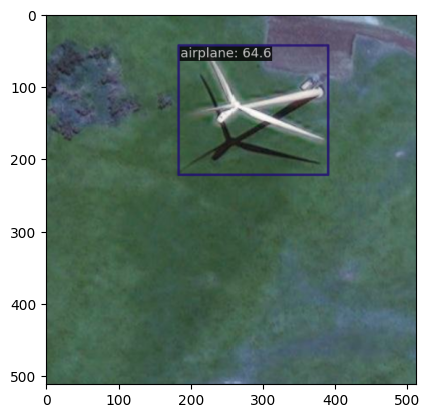

In [6]:
res_image = cv2.imread(r"data/output/vis/000000000042.tif")
plt.imshow(res_image)